In [1]:
from fit_modelSignal import *
from fit_modelControl import *
from scipy.optimize import minimize
import numdifftools as nd

In [2]:
baseDir = common.getBaseDirectory()
shaping = False

if shaping:
    X0 = np.load(baseDir + "data/templates/shaping_signalRegion/X_.npy")
    X1 = np.load(baseDir + "data/templates/shaping_controlRegion/X_.npy")
else:
    X0 = np.load(baseDir + "data/templates/counting_signalRegion/X_.npy")
    X1 = np.load(baseDir + "data/templates/counting_controlRegion/X_.npy")

    
Y0 = np.sum(X0,axis=1)+0.1
Y1 = np.sum(X1,axis=1)+0.1

model0 = PredictiveModel_Signal (X0,shaping)
model1 = PredictiveModel_Control(X1,shaping)


# define Model

In [4]:
(model1,X1,Y1)

In [11]:
def loss (param):
    y0 = model0.predict(param)
    y1 = model1.predict(param)
    loss  = np.sum( (y0-Y0)**2/(2*Y0) )
    loss += np.sum( (y1-Y1)**2/(2*Y1) )
    loss += np.sum( (param[3:]**2)/2  )
    return loss

param0 = np.array([0.107,0.108,0.1090] + [0.0]*22)
result = minimize( loss, param0, method='SLSQP', bounds = [(0,1)]*3 + [(-1,1)]*22 )
print(result.x[:3])

[0.10799872 0.10799771 0.10800808]


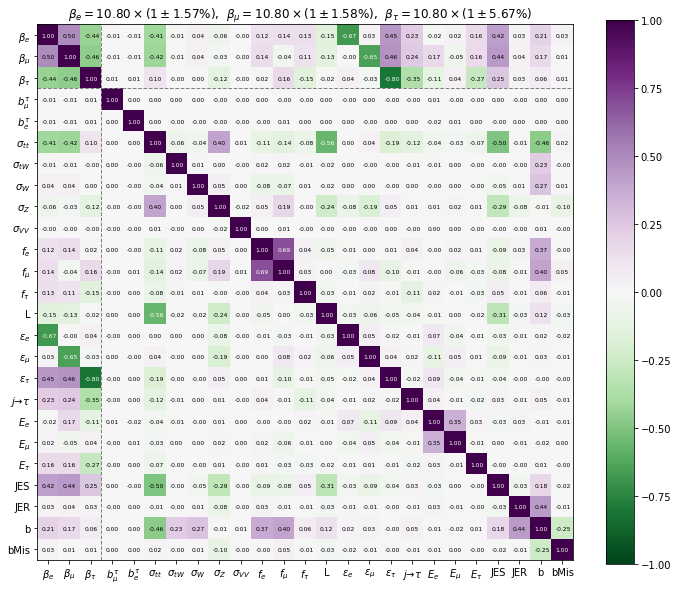

In [12]:
hcalc = nd.Hessian(loss, step=1e-4, method='central')
hess  = hcalc( result.x )
hessinv = np.linalg.inv(hess)
sig   = np.sqrt(hessinv.diagonal())
cor  = hessinv/np.outer(sig, sig)

commonp.showParameterCovMat(cor,sig)

In [14]:
for i in range(sig.size):
    c,s = result.x[i], sig[i]
    print('{:7.4f} +/- {:6.4f}'.format(c,s))

 0.1080 +/- 0.0017
 0.1080 +/- 0.0017
 0.1080 +/- 0.0061
-0.0000 +/- 0.9999
 0.0001 +/- 0.9998
 0.0002 +/- 0.5761
-0.0001 +/- 0.9968
-0.0000 +/- 0.9736
-0.0000 +/- 0.7151
-0.0000 +/- 0.9998
-0.0001 +/- 0.8041
 0.0005 +/- 0.5788
-0.0003 +/- 0.9379
 0.0002 +/- 0.8765
 0.0003 +/- 0.9689
 0.0007 +/- 0.9442
-0.0009 +/- 0.9822
-0.0004 +/- 0.9523
-0.0001 +/- 0.6799
 0.0003 +/- 0.9479
-0.0002 +/- 0.9959
-0.0003 +/- 0.8443
-0.0001 +/- 0.9864
 0.0000 +/- 0.0850
-0.0001 +/- 0.9920


In [9]:
# print(sig[0:3]/0.1080*100)
# print(1/sig[3:])